In [1]:
from utils.data import Data
from utils.estimators import Dataset, Classifier
%matplotlib inline

In [2]:
tiff_filename = "./HKH/Images/LE07_140041_20071221.tif"
shp_filename = "./HKH/Labels/HKH_CIDC_5basins_all.shp"

data = Data(tiff_filename, shp_filename, classes = ['Debris covered', 'Clean Ice', 'Background'])
tiff = data.read_tiff()
mask = data.get_mask(column="Glaciers")

/anaconda/envs/py37_default/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


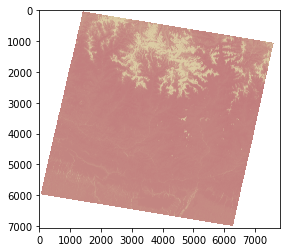

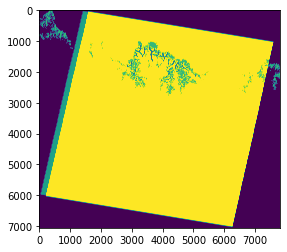

In [3]:
data.view_tiff(tiff, channel=1)
data.view_mask(mask)

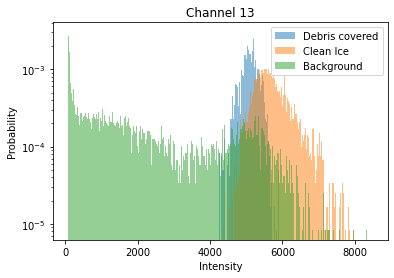

In [4]:
X,y = data.get_Xy(tiff, mask, n_sample = 2000000, save=False)
X_train, X_test, y_train, y_test = data.train_test_split(X, y, save=False)
data.get_histogram(X_train, y_train, channel = 13)

In [5]:
classifier = Classifier(savepath = "./outputs",
                        bands = ["B1","B2","B3","B4","B5","B6_VCID_1","B6_VCID_2","B7","B8","BQA","ndvi","ndsi","ndwi","elevation","slope"])

In [6]:
all_dataset = Dataset(X_train, X_test, y_train, y_test, classes = ['Debris covered', 'Clean Ice', 'Background'])

In [7]:
all_dataset.info()

No. of classes: 3
Class labels: ['Debris covered', 'Clean Ice', 'Background']
Total data samples: 478560
Train samples: 358920
	 1:Clean Ice = 119643
	 2:Background = 119599
	 0:Debris covered = 119678
Test stats: 119640
	 1:Clean Ice = 39877
	 2:Background = 39921
	 0:Debris covered = 39842



Random Forest
Elapsed_time training  122.246095 
Accuracy on train Set: 
0.9794243842639028
Accuracy on Test Set: 
0.9486292209963223
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     39842
           1       0.93      0.95      0.94     39877
           2       0.98      0.92      0.95     39921

    accuracy                           0.95    119640
   macro avg       0.95      0.95      0.95    119640
weighted avg       0.95      0.95      0.95    119640

Confusion Matrix: 
[[38606   890   346]
 [ 1485 37971   421]
 [  944  2060 36917]]


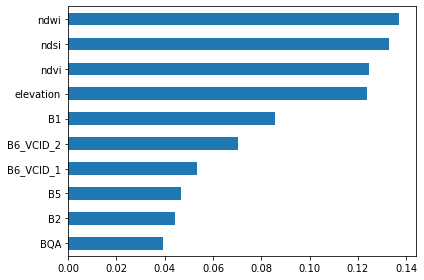

array([0, 1, 1, ..., 0, 2, 2])

In [8]:
classifier.random_forest(trainX=all_dataset.trainX, trainY=all_dataset.trainY, 
                         testX=all_dataset.testX, testY=all_dataset.testY, 
                         grid_search=False, train=True, 
                         n_estimators = 150, max_depth=20, 
                         feature_importance=True)

## Testing with a much smaller model to minimizing training/inference time


Random Forest
Elapsed_time training  8.036750 
Accuracy on train Set: 
0.9766772539841747
Accuracy on Test Set: 
0.9453861584754263
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     39842
           1       0.93      0.95      0.94     39877
           2       0.98      0.92      0.95     39921

    accuracy                           0.95    119640
   macro avg       0.95      0.95      0.95    119640
weighted avg       0.95      0.95      0.95    119640

Confusion Matrix: 
[[38482   974   386]
 [ 1550 37775   552]
 [  996  2076 36849]]


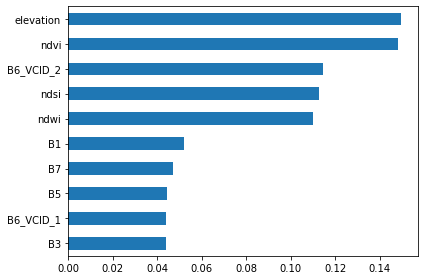

array([0, 1, 1, ..., 0, 2, 2])

In [9]:
classifier.random_forest(trainX=all_dataset.trainX, trainY=all_dataset.trainY, 
                         testX=all_dataset.testX, testY=all_dataset.testY, 
                         grid_search=False, train=True, 
                         n_estimators = 10, max_depth=20, 
                         feature_importance=True)

In [10]:
prediction = classifier.get_labels(tiff,"/estimator.sav")

	Batch 1 of 16
	Batch 2 of 16
	Batch 3 of 16
	Batch 4 of 16
	Batch 5 of 16
	Batch 6 of 16
	Batch 7 of 16
	Batch 8 of 16
	Batch 9 of 16
	Batch 10 of 16
	Batch 11 of 16
	Batch 12 of 16
	Batch 13 of 16
	Batch 14 of 16
	Batch 15 of 16
	Batch 16 of 16


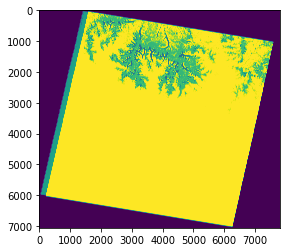

In [11]:
data.view_mask(prediction)